# Redes Neuronales - Lab 4

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Dataset

In [ ]:
X,y = make_classification(n_samples = 50, n_features = 3, n_informative=3, n_redundant = 0, n_classes = 2)

In [ ]:
X

array([[-1.5543525 ,  1.73763633,  1.71849297],
       [ 2.08706982,  0.5076644 ,  0.32597648],
       [-1.16214773,  0.88957933, -1.14190165],
       [-2.00177773, -2.43650177,  0.36618   ],
       [ 0.9023206 , -1.15961113, -0.5504985 ],
       [-0.75065831, -0.11909562, -1.38584344],
       [-0.81830143,  1.75568823,  2.87325902],
       [ 0.63077063,  0.9436088 ,  2.87115342],
       [ 0.22337075, -1.93390733,  0.46648065],
       [-1.55957422, -1.28891379,  0.20269345],
       [ 2.81992195, -0.21052089,  1.24088845],
       [ 0.44379043, -1.57904334, -0.8922019 ],
       [-0.68076422, -2.81313115, -1.21254358],
       [-1.14877738,  0.02788734, -0.3368613 ],
       [ 2.31990137,  0.03300533,  1.14378328],
       [-1.28134635, -0.21137161, -0.37131089],
       [ 0.14740223, -1.87371593, -1.17853659],
       [-1.21396637,  1.15192368, -0.92443015],
       [-0.73832033,  1.16104896, -1.60382434],
       [-1.13440397, -1.0980472 , -0.77553696],
       [ 0.57787964,  2.35024365, -0.541

In [ ]:
yt = np.array([[r] for r in y])
yt

array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0]])

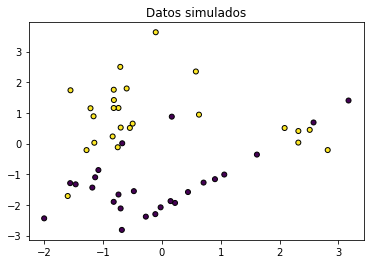

In [ ]:
plt.title("Datos simulados", fontsize="large")
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

In [ ]:
np.random.seed(42)
weights = np.random.rand(3,1)
bias = np.random.rand(1)
lr = 0.05

In [ ]:
# Clase RedNeuronal extraída de: https://towardsdatascience.com/inroduction-to-neural-networks-in-python-7e0b422e6c24

class RedNeuronal(object):
    def __init__(self, inputs, outputs):
        self.inputs = inputs
        self.outputs = outputs
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))
    
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    def train(self, epochs=25000):
        for epoch in range(epochs):
            self.feed_forward()
            self.backpropagation()
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)
        
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction


In [ ]:
RN = RedNeuronal(X, yt)
RN.train()

Text(0, 0.5, 'Error promedio')

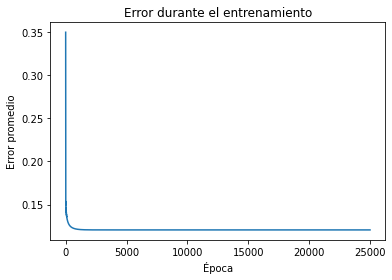

In [ ]:
plt.plot(list(range(1, 25001)), RN.error_history)
plt.title("Error durante el entrenamiento")
plt.xlabel("Época")
plt.ylabel("Error promedio")

In [ ]:
test = np.array([[1,0,1]])
RN.predict(test)

array([[0.939424]])

\* Nota: No se pueden mostrar métricas de desempeño para la predicción de [1,0,1] ya que no se sabe cuál es el resultado esperado que debería obtener la red neuronal, solo se sabe que el resultado que predice es 0.9394

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6691707f-0bf9-4583-ad6a-98274554c244' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>